In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras

Some Required Libraries

In [3]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


train and validation path

In [0]:
train_path = '/content/drive/My Drive/SwitchOn Assignment/train'
valid_path = '/content/drive/My Drive/SwitchOn Assignment/Valid'

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

Generating batches of images for train and validation

In [6]:
train_data = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=10,class_mode='categorical')

Found 1910 images belonging to 2 classes.


In [7]:
valid_data = valid_datagen.flow_from_directory(valid_path,target_size=(224,224),batch_size=10,class_mode='categorical')

Found 1341 images belonging to 2 classes.


Using Transfer learning technique for Modeling

In [8]:
#Download VGG16 model
vgg_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 12s 0us/step


In [9]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Dropping last .i.e., output layer of the VGG16 Model

In [10]:
vgg_model.layers.pop()

In [11]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Makin a Sequential Model and Adding VGG16 layers to our Model

In [0]:
model = Sequential()
for layer in vgg_model.layers:
  model.add(layer)

In [0]:
# making trainable parameter false because we use weights of VGG16 model's 
for layer in model.layers:
  layer.trainable=False

In [0]:
# Adding Output layer with 2 neurons for our model
model.add(Dense(2,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
# compiler is set with adam optimizer and categorical_crossentropy as loss fucntion
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
classification = model.fit_generator(train_data, validation_data = valid_data, epochs = 10,
                                           steps_per_epoch = len(train_data), validation_steps = len(valid_data))

Epoch 1/10
191/191 [==============================] - 940s 5s/step - loss: 0.6392 - accuracy: 0.6518 - val_loss: 1.1747 - val_accuracy: 0.5988
Epoch 2/10
191/191 [==============================] - 57s 299ms/step - loss: 0.4481 - accuracy: 0.8115 - val_loss: 0.0776 - val_accuracy: 0.9008
Epoch 3/10
191/191 [==============================] - 57s 300ms/step - loss: 0.3808 - accuracy: 0.8403 - val_loss: 0.5890 - val_accuracy: 0.8993
Epoch 4/10
191/191 [==============================] - 57s 300ms/step - loss: 0.2940 - accuracy: 0.8880 - val_loss: 0.2905 - val_accuracy: 0.9463
Epoch 5/10
191/191 [==============================] - 58s 302ms/step - loss: 0.2971 - accuracy: 0.8780 - val_loss: 0.0272 - val_accuracy: 0.9396
Epoch 6/10
191/191 [==============================] - 57s 300ms/step - loss: 0.2311 - accuracy: 0.9215 - val_loss: 0.0448 - val_accuracy: 0.9493
Epoch 7/10
191/191 [==============================] - 57s 300ms/step - loss: 0.2263 - accuracy: 0.9157 - val_loss: 0.1027 - val_accu

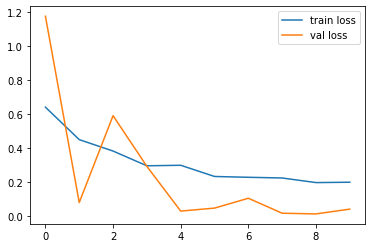

In [20]:
# ploting loss and validation loss values
plt.plot(classification.history['loss'], label='train loss')
plt.plot(classification.history['val_loss'], label='val loss')
plt.legend()
plt.show()

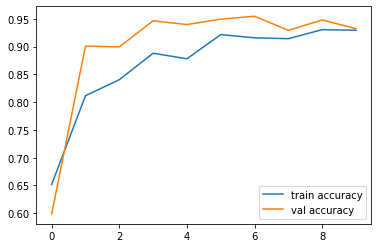

In [21]:
# ploting accuracy and validation accuracy values
plt.plot(classification.history['accuracy'], label='train accuracy')
plt.plot(classification.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

Importing Libraries

In [0]:
from skimage.measure import compare_ssim
import imutils
import cv2

In [0]:
# Function which prepare image for prediction
def img_prepare(filepath):
  img_size = 224
  img = cv2.imread(filepath)
  img_array = cv2.resize(img, (img_size,img_size))
  return img_array.reshape(-1,img_size,img_size,3)

Paths for Good Image And Testing Image

In [0]:
good_img_path = '/content/drive/My Drive/SwitchOn Assignment/classification/good_image.png' 

In [0]:
test_path = '/content/drive/My Drive/SwitchOn Assignment/classification/bad_image.png'

In [0]:
good_gray_img = cv2.imread(good_img_path,cv2.IMREAD_GRAYSCALE)
test_gray_img = cv2.imread(test_path,cv2.IMREAD_GRAYSCALE)

Plotting Both Images

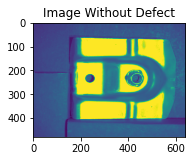

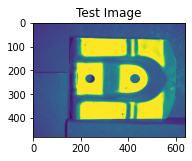

In [27]:
plt.subplot(1,2,1)
plt.imshow(good_gray_img)
plt.title("Image Without Defect")
plt.show()

plt.subplot(1,2,2)
plt.imshow(test_gray_img)
plt.title("Test Image")
plt.show()


In [0]:
prediction = model.predict(img_prepare(test_path))

IF Predicted image is bad then we show the the defect in the image or we show the difference in image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


SSIM: 0.8847881531135627


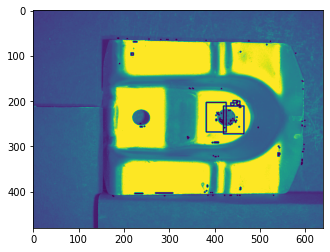

In [29]:
if int(np.round(prediction[:,1])[0]) == 0:  # o for Bad and 1 for good
  #compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(good_gray_img, test_gray_img, full=True)
  diff = (diff * 255).astype("uint8")
  print("SSIM: {}".format(score))

  # threshold the difference image, followed by finding contours to obtain the regions of the two input images that differ
  thresh = cv2.threshold(diff, 5, 255, cv2.THRESH_BINARY_INV)[1]
  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  # loop over the contours to mark the defect 
  for c in cnts:
	  (x, y, w, h) = cv2.boundingRect(c)
	  cv2.rectangle(test_gray_img, (x, y), (x + w, y + h), (0, 220, 255), 2)
   
  plt.imshow(test_gray_img)
  plt.show()